## I. Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


## II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("heart.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


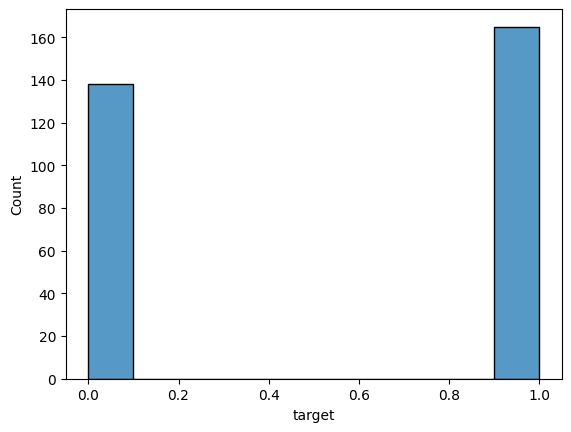

In [ ]:
y = dataset["target"]

sns.histplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))



Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

<Axes: ylabel='sex'>

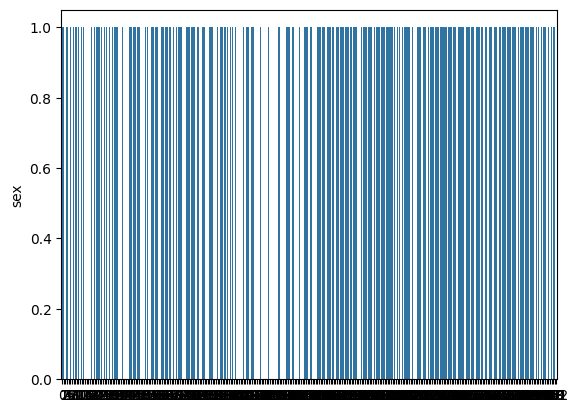

In [ ]:
sns.barplot(dataset["sex"])

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Axes: ylabel='cp'>

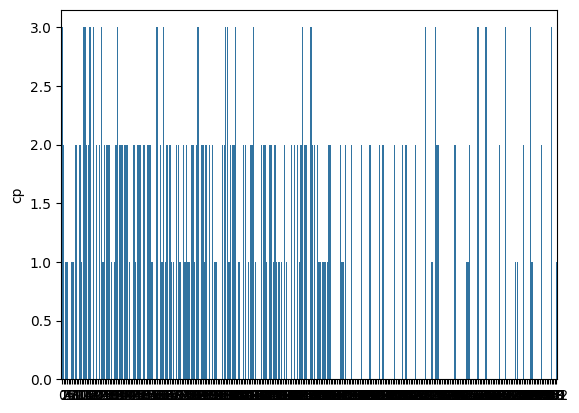

In [ ]:
sns.barplot(dataset["cp"])

In [ ]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

<Axes: ylabel='fbs'>

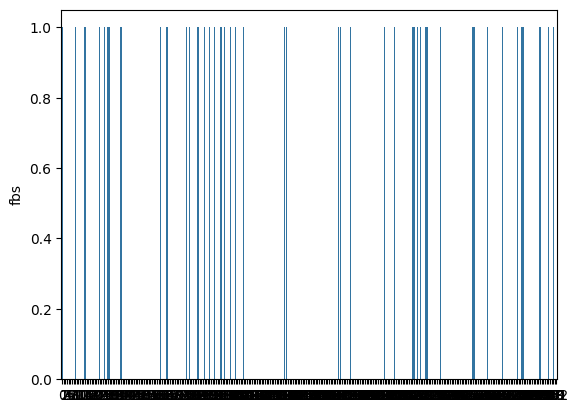

In [ ]:
sns.barplot(dataset["fbs"])

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: ylabel='restecg'>

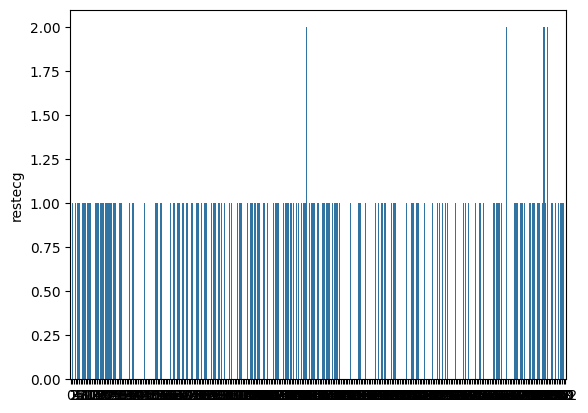

In [ ]:
sns.barplot(dataset["restecg"])

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: ylabel='exang'>

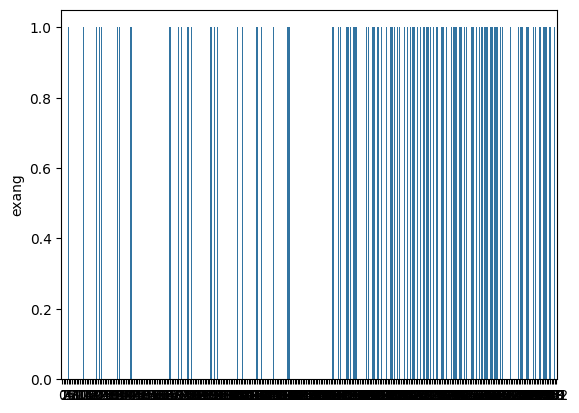

In [ ]:
sns.barplot(dataset["exang"])

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: ylabel='slope'>

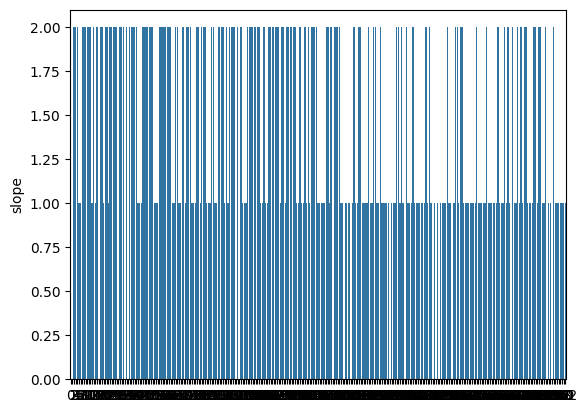

In [ ]:
sns.barplot(dataset["slope"])

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='ca'>

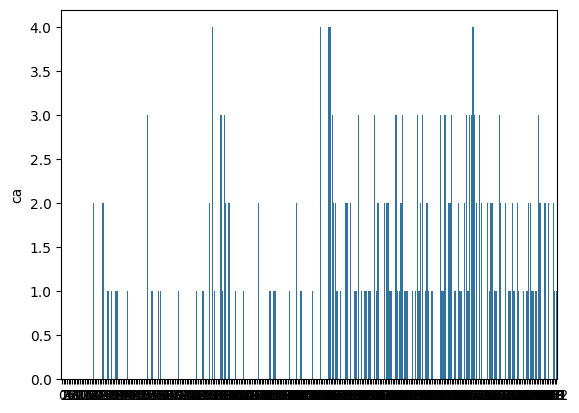

In [ ]:
sns.barplot(dataset["ca"])

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: ylabel='thal'>

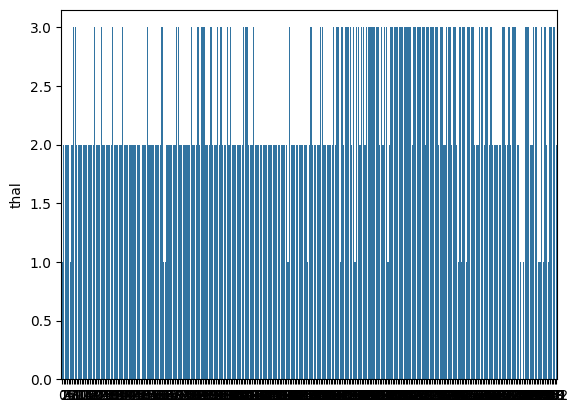

In [ ]:
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

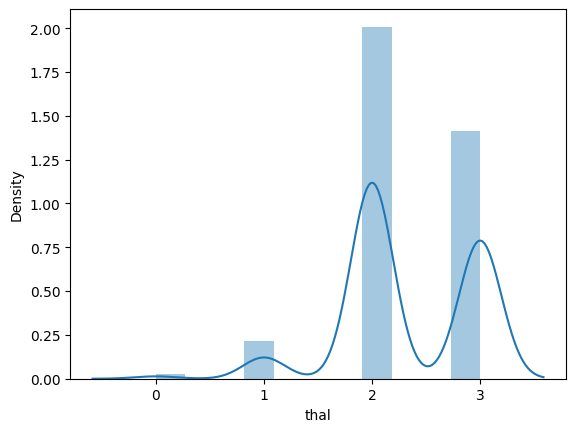

In [ ]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2) # C5.0, max depth of tree = 3. #max depth means: level 0 , 1, 2, 3 in decision tree photo below
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\nentropy = 0.995\nsamples = 242\nvalue = [111, 131]'),
 Text(0.25, 0.5, 'x[11] <= 0.5\nentropy = 0.858\nsamples = 117\nvalue = [84, 33]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.991\nsamples = 54\nvalue = [24, 30]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.276\nsamples = 63\nvalue = [60, 3]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.753\nsamples = 125\nvalue = [27, 98]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.149\nsamples = 47\nvalue = [1, 46]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.918\nsamples = 78\nvalue = [26, 52]')]

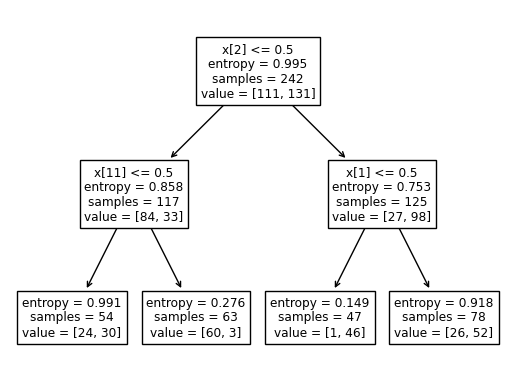

In [ ]:
from sklearn import tree
tree.plot_tree(model)

In [ ]:
fn=["age",	"sex",	"cp",	"trestbps",	"chol",	"fbs",	"restecg",	"thalach","xang",	"oldpeak",	"slope","ca",	"thal"]   # beautification, fn = feature names, cn = class names
cn=["target"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)  # 1- row, 1- column
tree.plot_tree(model,
               feature_names = fn,  # keywords of tree function
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    46
0    15
Name: count, dtype: int64

In [ ]:
preds

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pd.crosstab(Y_test,preds)

col_0,0,1
target,,
0,13,14
1,2,32


In [ ]:
np.mean(preds==Y_test)

0.7377049180327869

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %
